In [1]:
#4. Use Autoencoder to implement anomaly detection.
#a. Import required libraries 
#b. Upload / access the dataset 
#c. Encoder converts it into latent representation 
#d. Decoder networks convert it back to the original input 
#e. Compile the models with Optimizer, Loss, and Evaluation Metrics

In [3]:
#!) Import required libraries
#Let's build the simplest possible autoencoder
#We'll start simple, with a single fully-connected neural layer as encoder and as decoder:
import keras
from keras import layers

In [4]:
# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

In [5]:
# This is our input image
input_img = keras.Input(shape=(784,))

In [6]:
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)

In [7]:
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

In [8]:
# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [11]:
#Let's also create a separate encoder model:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img,encoded)

In [12]:
#As well as the decoder model
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))

In [13]:
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

In [14]:
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [15]:
#Now let's train our autoencoder to reconstruct MNIST digits.
#First, we'll configure our model to use a per-pixel binary crossentropy loss, and the Adam optimizer:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [16]:
#Let's prepare our input data. We're using MNIST digits, and we're discarding the labels (since we're only interested in encoding/decoding the input images).
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [17]:
#We will normalize all values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784.
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [18]:
#Now let's train our autoencoder for 50 epochs:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 5s 12ms/step - loss: 0.2759 - val_loss: 0.1863
Epoch 2/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1678 - val_loss: 0.1514
Epoch 3/50
235/235 [==============================] - 2s 11ms/step - loss: 0.1428 - val_loss: 0.1325
Epoch 4/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1277 - val_loss: 0.1204
Epoch 5/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1176 - val_loss: 0.1122
Epoch 6/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1107 - val_loss: 0.1066
Epoch 7/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1058 - val_loss: 0.1025
Epoch 8/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1022 - val_loss: 0.0994
Epoch 9/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0996 - val_loss: 0.0972
Epoch 10/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0977 - val_lo

In [19]:
#After 50 epochs, the autoencoder seems to reach a stable train/validation loss value of about 0.09. We can try to visualize the reconstructed inputs and the encoded representations. We will use Matplotlib.

In [20]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 3ms/step


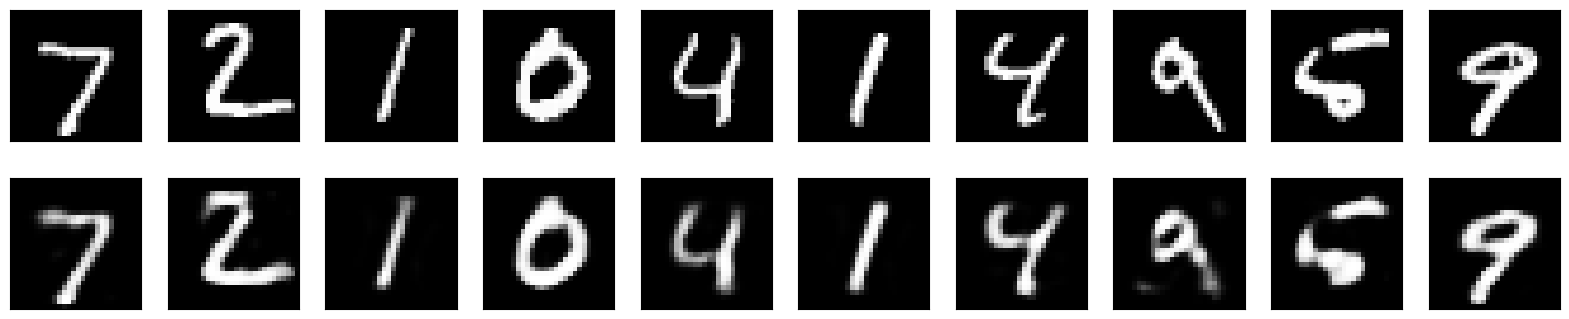

In [22]:
# Use Matplotlib

import matplotlib.pyplot as plt
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
     # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#Here's what we get. The top row is the original digits, and the bottom row is the reconstructed digits. We are losing quite a bit of detail with this basic approach.